In [20]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from scipy.linalg import inv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
pddf = pd.DataFrame

In [5]:
def mahalanobis_r_pd(X,mean,S_inv):
    data = []
    for i in range(X.shape[0]):
        data.append(mahalanobis(X.iloc[i,:],mean,S_inv) ** 2)
    ser_ = pd.Series(data, X.index.values)
    return(ser_)# should be series

In [31]:
def stal_plot(df, disp = False):
    '''The stalactite plot for the detection of multivariate outliers. Atkinson, A.C. & Mulira, HM. Stat Comput (1993) 3: 27. https://doi.org/10.1007/BF00146951'''
    import pandas as pd
    
    import numpy as nd
    import time
    import progressbar

    
    #needs index initialization
    n = df.shape[0]
    p = df.shape[1]
    i = np.asarray(range(0,n))
    
    
    pd.set_option('display.max_rows', n-p)
    pd.set_option('display.max_columns', n)
    
    
    
    thresh = chi2.ppf((n-0.5)/n, p)
    
    
    ind = np.zeros((n-p, n))
    ind_1 = 0
    
    sample = np.random.choice(i, p+1,replace=False) # first randomly samle n+1 for the first sample mean

    with progressbar.ProgressBar(max_value=n-p) as bar:
   
        
        x_mean = df.iloc[sample].mean()
        S = df.iloc[sample].cov()
        #print(S.shape)
        S_inv = inv(S)
        M = mahalanobis_r_pd(df, x_mean, S_inv)
        ind_2 = i[M > thresh]   
        ind[ind_1, ind_2] = 1
        bar.update(ind_1)

        for e in (range(p+2,n+1)):
            #print(e) 
            ind_1 +=1
            #print(ind_1)
            x_mean = df.loc[M.nlargest(e).index.values].mean()
            S = df.loc[M.nlargest(e).index.values].cov()
            #print(S.shape)
            S_inv = inv(S)
            M = mahalanobis_r_pd(df, x_mean, S_inv)
            ind_2 = i[M > thresh]   
            #print(ind_2)
            ind[ind_1, ind_2] = 1#??
            bar.update(ind_1)
    
        out_ind = ind_2
        plot = pd.DataFrame(ind)
        if disp == True:
            plot_ = plot.replace(0, ' ')
            plot_ = plot_.replace(1, '*')
            display(plot_)
    
    format_dictionary = {'outl': int(sum(plot.iloc[-1])), 'index': out_ind}
    if sum(plot.iloc[-1])==0:
        print('The stalactite plot found no strage observations')
    else:
        print('The stalactite plot found {outl} strage observations.\nIndexes{index} are suspicious. '.format(**format_dictionary))
    return out_ind
 

In [24]:

def qqplot(data):
    import scipy as sp
    '''takes continuous data as np.array and returns qq plot https://en.wikipedia.org/wiki/Q–Q_plot'''

    df = data
    n = df.shape[0]
    p = df.shape[1]
    
    S = np.cov(df.T)
    S_inv = inv(S)

    mean = df.mean(axis=0)


    d_squared = mahalanobis_r_pd(df,mean,S_inv)

    d_squared =d_squared.sort_values()
    quantiles = np.linspace(0.5,n-0.5,n)/n

    x = chi2.ppf(quantiles, p)
    plt.scatter(d_squared, x)
    plt.title('QQ plot for Multivariable normality')
    plt.xlabel('Squared Mahalanobis distances')
    plt.ylabel('Chi-squared quantiles')
    plt.plot(x, x, color='r')




In [25]:
import numpy.random as nr

cov = np.array([[1.0, 0.1, 0.1,],
                        [0.1, 1.0, 0.1,],
                        [0.1, 0.1, 1.0]])
mu  = np.log([0.3, 0.4, 0.5])

mvn = nr.multivariate_normal(mu, cov, size=400)

mvn =pddf(mvn)  
mvn.loc[15]=[10000000,2020323891,347123904781]

In [26]:
qqplot(mvn)

/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


In [27]:
x = stal_plot(mvn)

/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


The stalactite plot found 1.0 strage observations.
Indexes[15] are suspicious. 


In [28]:
mvn.loc[x]

0             1             2
15  10000000.0  2.020324e+09  3.471239e+11

In [29]:
mvn.drop(x,axis =0, inplace=True)



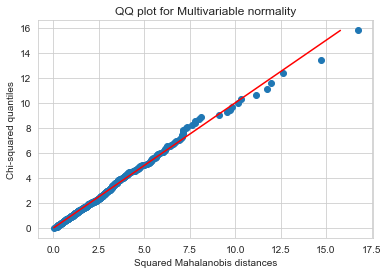

In [30]:
qqplot(mvn)